### Social Network Ads
A categorical dataset to determine whether a user purchased a particular product

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df= pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

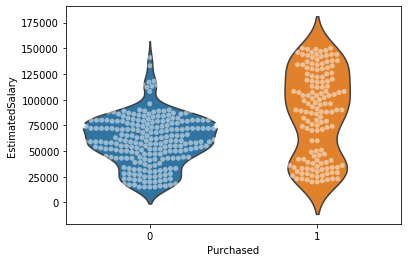

In [4]:
sn.violinplot(x="Purchased", y="EstimatedSalary", data=df, inner=None)
plot = sn.swarmplot(x="Purchased",y="EstimatedSalary", data=df, color="w", alpha=0.5)

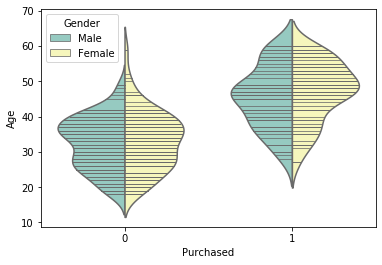

In [5]:
plot = sn.violinplot(x="Purchased", y="Age", hue="Gender", data = df, split = True, inner = "stick", palette="Set3")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
df.Gender=label.fit_transform(df.Gender)

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [9]:
# x = df.iloc[:, [1,2]].values
# y = df.iloc[:,3].values

In [10]:
x=df.drop(['User ID','Purchased'],axis='columns')
y=df.Purchased

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


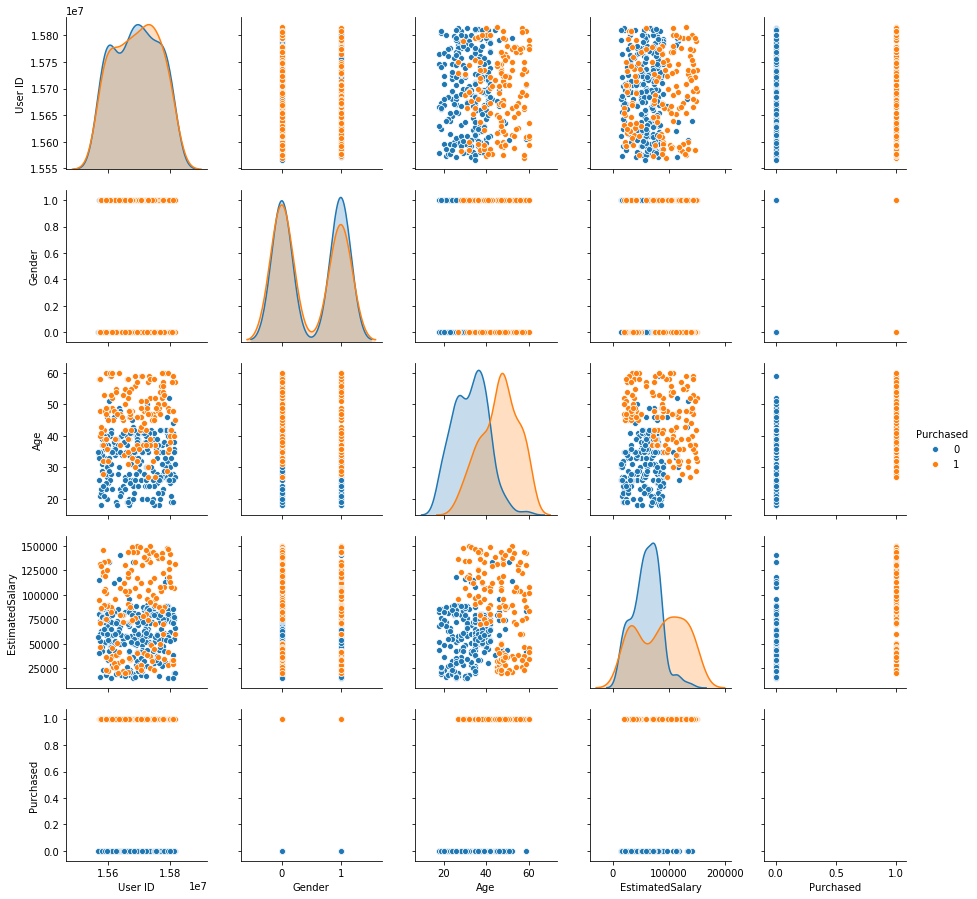

In [11]:
sn.pairplot(df,hue = "Purchased")

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
len(X_train)

300

In [14]:
len(y_test)

100

#### Feature Scaling 

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

### SVM
Fitting svm to training set

In [16]:
from sklearn.svm import SVC
model=SVC(kernel = 'linear', degree = 3, random_state= 0)
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [18]:
model.score(X_test,y_test)

0.89

In [19]:
# Predicting the Test Set results
y_pred= model.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 9, 23]], dtype=int64)

#  SVM poly

In [20]:
# Fitting SVM to the Training Set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', degree = 5, random_state= 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
# Predicting the Test Set results
y_pred= classifier.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [12, 20]], dtype=int64)

### GradientBoost

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
boost_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01)
boost_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
yp = boost_reg.predict(X_test)

In [24]:
yp

array([0.05971799, 0.09354387, 0.09282776, 0.09176284, 0.04859295,
       0.04859295, 0.04859295, 0.84577779, 0.04859295, 0.62781538,
       0.04859295, 0.04859295, 0.09354387, 0.13777867, 0.07632383,
       0.82243617, 0.13777867, 0.07632383, 0.87152386, 0.04859295,
       0.04859295, 0.72129166, 0.09354387, 0.72971173, 0.04859295,
       0.70253788, 0.05971799, 0.07632383, 0.09354387, 0.07632383,
       0.05971799, 0.13671375, 0.79635843, 0.09354387, 0.04859295,
       0.04859295, 0.07632383, 0.04859295, 0.04859295, 0.88052677,
       0.05971799, 0.09354387, 0.07632383, 0.04859295, 0.75579136,
       0.04859295, 0.12127474, 0.82542104, 0.04859295, 0.59957526,
       0.87152386, 0.04859295, 0.04859295, 0.65635668, 0.99440703,
       0.69016808, 0.07632383, 0.07632383, 0.88052677, 0.04859295,
       0.04859295, 0.718585  , 0.09282776, 0.8028806 , 0.04859295,
       0.79635843, 0.05971799, 0.04859295, 0.09354387, 0.15167358,
       0.85779786, 0.09282776, 0.04859295, 0.69016808, 0.05971

##### Making the Confusion Matrix

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yp.round())
print(cm)

[[64  4]
 [ 2 30]]


In [26]:
# model.predict([[1,19,76000],[1,19,19000],[0,50,23000],[0,49,36000]])

# Decision Tree Classifier 

In [27]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
yp = model2.predict(X_test)
yp

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [29]:
model2.score(X_test,y_test)

0.91

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [31]:
cm=confusion_matrix(y_test,yp)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

Text(51.0, 0.5, 'Actual')

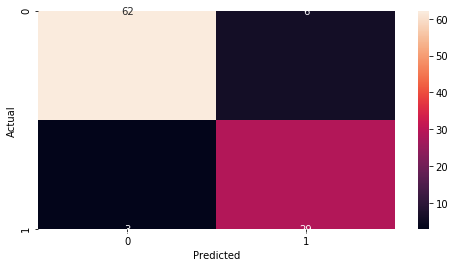

In [32]:
import seaborn as sn
plt.figure(figsize=(8,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel("Actual")

In [33]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor()
model3.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [34]:
model3.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.])

In [35]:
model.score(X_test,y_test)

0.89